# LO3: HIC Basics

## Import

In [13]:
from pathlib import Path
from joblib import load
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import matplotlib.pyplot as plt

import random

### Import Dataframe

In [14]:
source_path = Path('./data/clean/employees.dump')
df = load(source_path)

df.head()

,direktion_name,amt_bereich_name,indikator,wert,jahr,identifier
90,Baudirektion,"Amt fuer Abfall, Wasser, Energie und Luft",Frauen,0.0,1980,"Baudirektion Amt fuer Abfall, Wasser, Energie ..."
91,Baudirektion,"Amt fuer Abfall, Wasser, Energie und Luft",Maenner,0.0,1980,"Baudirektion Amt fuer Abfall, Wasser, Energie ..."
94,Baudirektion,Amt fuer Landschaft und Natur,Frauen,41.0,1980,Baudirektion Amt fuer Landschaft und Natur
95,Baudirektion,Amt fuer Landschaft und Natur,Maenner,10.0,1980,Baudirektion Amt fuer Landschaft und Natur
86,Baudirektion,Amt fuer Raumentwicklung,Frauen,0.0,1980,Baudirektion Amt fuer Raumentwicklung


In [15]:
df.columns

Index(['direktion_name', 'amt_bereich_name', 'indikator', 'wert', 'jahr',
       'identifier'],
      dtype='object')

In [16]:
colors = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'grey', 'green', 'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgrey', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'rebeccapurple', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']

In [17]:
fig = make_subplots(rows=1, cols=2)

unique_identifiers = df['identifier'].unique()
identifiers_colors = {identifier: random.choice(colors) for identifier in unique_identifiers}

df['color'] = df['identifier'].map(identifiers_colors)

df_frauen = df[df['indikator']=='Frauen']
fig.add_trace(go.Scatter(x=df_frauen['jahr'], y=df_frauen['wert'], hovertext=df_frauen['identifier'], mode='markers',
                         marker=dict(size=10, color=df_frauen['color']), name='Frauen'), row=1, col=1)

df_maenner = df[df['indikator']=='Maenner']
fig.add_trace(go.Scatter(x=df_maenner['jahr'], y=df_maenner['wert'], hovertext=df_maenner['identifier'], mode='markers',
                         marker=dict(size=10, color=df_maenner['color']), name='Maenner', text='Maenner'), row=1, col=2)

fig.update_yaxes(title_text='Wert', range=[min(df['wert']), max(df['wert'])], row=1, col=1)
fig.update_yaxes(title_text='Wert', range=[min(df['wert']), max(df['wert'])], row=1, col=2)

fig.update_xaxes(title_text='Jahr', row=1, col=1)
fig.update_yaxes(title_text='Anzahl angestellte Frauen', row=1, col=1)
fig.update_xaxes(title_text='Jahr', row=1, col=2)
fig.update_yaxes(title_text='Anzahl angestellte Männer', row=1, col=2)

fig.update_layout({'title': 'Anzahl angestellter des Kantons Zürich von 1980 bis 2021'})

fig.show()

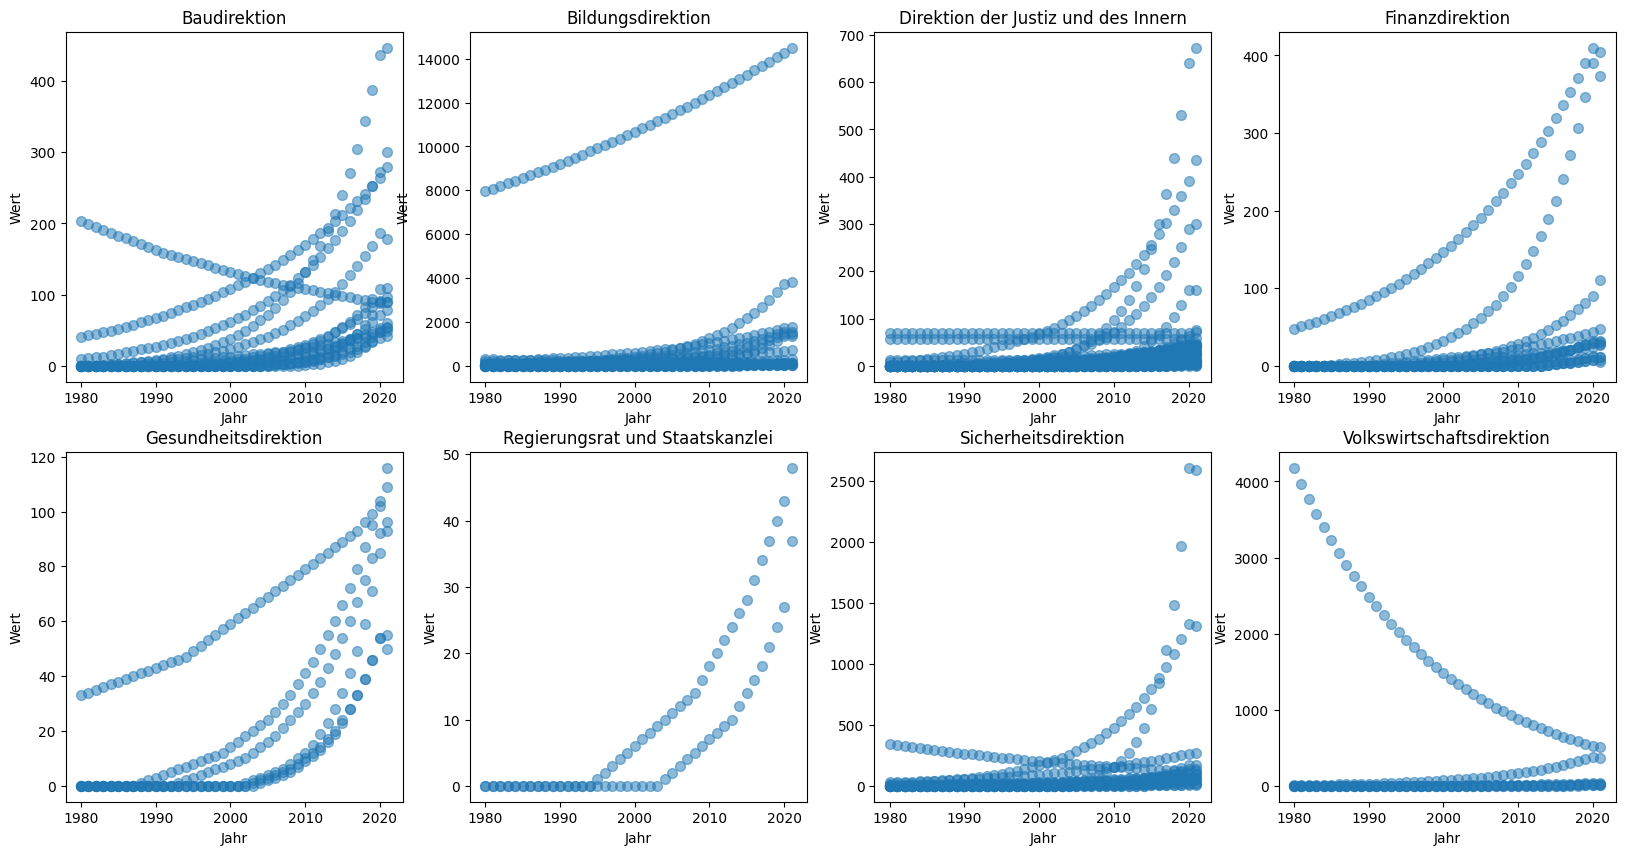

In [18]:
grouped_df = df.groupby('direktion_name')

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = [*ax0, *ax1]
for i, (name, group) in enumerate(grouped_df):
    axs[i].scatter(x=group['jahr'], y=group['wert'],s=50, alpha=0.5)
    axs[i].set_title(name)
    axs[i].set_xlabel('Jahr')
    axs[i].set_ylabel('Wert')